In [149]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import datetime as dt
import matplotlib.style as style
# Use a clean stylizatino for our charts and graphs
style.use('fivethirtyeight')

In [150]:
import warnings  # to ignore seaborn warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn = ignore_warn

In [151]:
train=pd.read_csv("AdvWorksCusts.csv")
ave_spend=pd.read_csv("AW_AveMonthSpend.csv")
bike_buyer=pd.read_csv('AW_BikeBuyer.csv')
test=pd.read_csv('AW_test.csv')

In [57]:
train.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [152]:

print(train.shape)

print (train['CustomerID'].unique().shape)

print(bike_buyer.shape)

(16519, 23)
(16404,)
(16519, 2)


In [153]:
print('Shape before merging Data:', train.shape)
train=pd.merge(train,bike_buyer,how='inner', on='CustomerID')
print('Shape After merging Data:', train.shape)

Shape before merging Data: (16519, 23)
Shape After merging Data: (16749, 24)


In [154]:
train.drop_duplicates('CustomerID',keep='first',inplace=True)

In [155]:
test.drop_duplicates('CustomerID',keep='first',inplace=True)

In [156]:
print(train.shape)
print()

print (train['CustomerID'].unique().shape)

print()

print(test.shape)

print (test['CustomerID'].unique().shape)

(16404, 24)

(16404,)

(500, 23)
(500,)


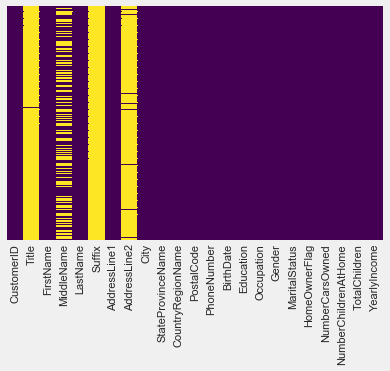

In [157]:
sns.heatmap(test.isnull(),cbar=False, cmap='viridis',yticklabels=False)

In [158]:
test.drop(labels = ['Title','MiddleName','Suffix','AddressLine2'], axis = 1, inplace = True)
train.drop(labels = ['Title','MiddleName','Suffix','AddressLine2'], axis = 1, inplace = True)

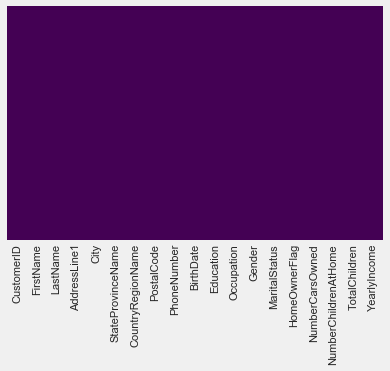

In [159]:
sns.heatmap(test.isnull(),cbar=False, cmap='viridis',yticklabels=False)

In [160]:
#Creating a function to extract the age of each person from their Date of Birth to when the data was collected
def Age(DOB):
    Date = dt.date(1998,1,1).year  # where Date is the date the data was collected given as 1998-01-01
    Year = DOB.split('-')[0]
    Age = Date - int(Year)
    return Age

In [161]:
def Age_test(DOB):
    Date = dt.date(1998,1,1).year  # where Date is the date the data was collected given as 1998-01-01
    Year = DOB.split('/')[-1]
    Age = Date - int(Year)
    return Age

In [162]:
train['Age'] = train['BirthDate'].apply(lambda x : Age(x))

In [163]:
train['BikeBuyer'].value_counts(normalize=True)

0    0.667703
1    0.332297
Name: BikeBuyer, dtype: float64

In [164]:
test['Age'] = test['BirthDate'].apply(lambda x : Age_test(x))

In [165]:
test.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,53
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,34
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,64
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,40
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,33


In [166]:
train.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BikeBuyer                int64
Age                      int64
dtype: object

In [167]:
train.drop(labels = ['FirstName','LastName','BirthDate'], axis = 1, inplace = True)
test.drop(labels = ['FirstName','LastName','BirthDate'], axis = 1, inplace = True)

In [168]:
train.drop(labels = ['AddressLine1','PostalCode','PhoneNumber','City','CustomerID'], axis = 1, inplace = True)
test.drop(labels = ['AddressLine1','PostalCode','PhoneNumber','City','CustomerID'], axis = 1, inplace = True)

In [169]:
test.drop(labels = ['StateProvinceName'], axis = 1, inplace = True)

In [170]:
train.drop(labels = ['StateProvinceName'], axis = 1, inplace = True)

In [171]:
train.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,0,32
1,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,1,33
2,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,0,33
3,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,0,30
4,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,1,30


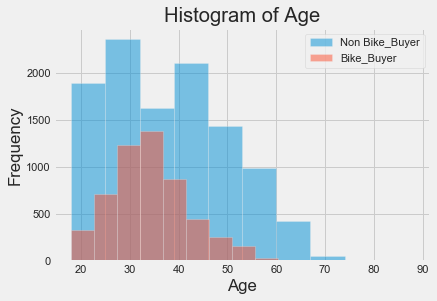

In [172]:
# get a histogram of the plasma_glucose_concentration column for
# both classes

col = 'Age'
plt.hist(train[train['BikeBuyer']==0][col], 10, alpha=0.5, label='Non Bike_Buyer')
plt.hist(train[train['BikeBuyer']==1][col], 10, alpha=0.5, label='Bike_Buyer')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

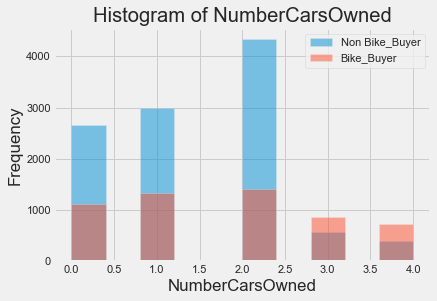

In [173]:

col = 'NumberCarsOwned'
plt.hist(train[train['BikeBuyer']==0][col], 10, alpha=0.5, label='Non Bike_Buyer')
plt.hist(train[train['BikeBuyer']==1][col], 10, alpha=0.5, label='Bike_Buyer')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

C:\Users\Opeyemi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


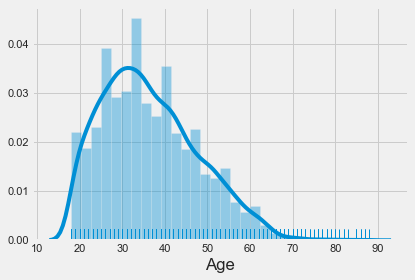

In [174]:
sns.distplot(train['Age'],bins=30, rug=True)

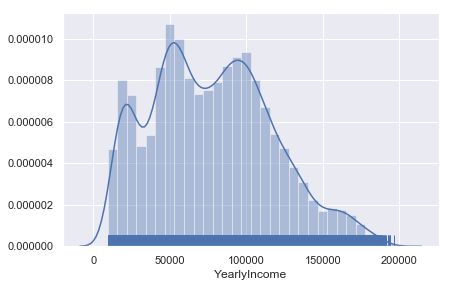

In [129]:
sns.distplot(train['YearlyIncome'],bins=30, rug=True)

In [175]:
train['Age']=np.log(train['Age'])
train['YearlyIncome']=(train['YearlyIncome'])**0.5
test['Age']=np.log(test['Age'])
test['YearlyIncome']=(test['YearlyIncome'])**0.5

In [176]:
train.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,Australia,Bachelors,Professional,M,M,1,0,0,2,371.412170,0,3.465736
1,Australia,Bachelors,Professional,M,S,0,1,3,3,318.026728,1,3.496508
2,Australia,Bachelors,Professional,M,M,1,1,3,3,303.224339,0,3.496508
3,Australia,Bachelors,Professional,F,S,0,1,0,0,294.428260,0,3.401197
4,Australia,Bachelors,Professional,F,S,1,4,5,5,304.583322,1,3.401197


In [177]:
train.corr()['BikeBuyer']

HomeOwnerFlag           0.000127
NumberCarsOwned         0.164835
NumberChildrenAtHome    0.455930
TotalChildren           0.233594
YearlyIncome            0.273008
BikeBuyer               1.000000
Age                    -0.093858
Name: BikeBuyer, dtype: float64

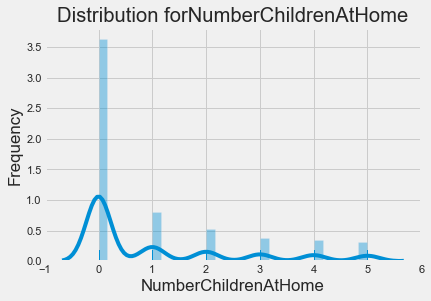

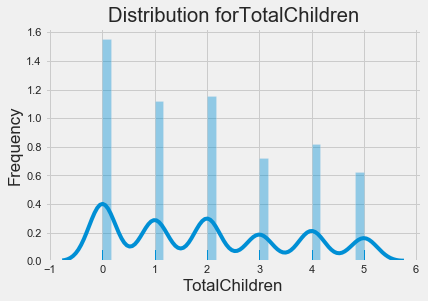

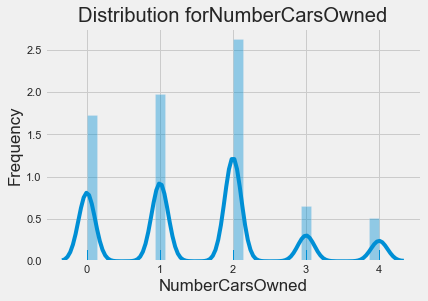

In [178]:
column=['NumberChildrenAtHome','TotalChildren','NumberCarsOwned']
def distplot(df, column, bins = 30, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(train, column, hist= True)

In [180]:
def Numberchildren(n):
    if n>0:
        return 'More than 1'
    else:
        return 'No Children'

In [181]:
train['NumberChildrenAtHome'] = train['NumberChildrenAtHome'].apply(lambda x: Numberchildren(x))

In [182]:
test['NumberChildrenAtHome'] = test['NumberChildrenAtHome'].apply(lambda x: Numberchildren(x))

In [183]:
train['TotalChildren'] = train['TotalChildren'].apply(lambda x: Numberchildren(x))
test['TotalChildren'] = test['TotalChildren'].apply(lambda x: Numberchildren(x))

In [184]:
train.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,Australia,Bachelors,Professional,M,M,1,0,No Children,More than 1,371.412170,0,3.465736
1,Australia,Bachelors,Professional,M,S,0,1,More than 1,More than 1,318.026728,1,3.496508
2,Australia,Bachelors,Professional,M,M,1,1,More than 1,More than 1,303.224339,0,3.496508
3,Australia,Bachelors,Professional,F,S,0,1,No Children,No Children,294.428260,0,3.401197
4,Australia,Bachelors,Professional,F,S,1,4,More than 1,More than 1,304.583322,1,3.401197


In [185]:
def NumberCars(n):
    if n == 0:
        return 'No car'
    elif n>0 and n<3:
        return '>1 cars'
    
    else:
        return '>3 cars'

In [186]:
train['NumberCarsOwned'] = train['NumberCarsOwned'].apply(lambda x: NumberCars(x))
test['NumberCarsOwned'] = test['NumberCarsOwned'].apply(lambda x: NumberCars(x))

In [187]:
train.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,Australia,Bachelors,Professional,M,M,1,No car,No Children,More than 1,371.412170,0,3.465736
1,Australia,Bachelors,Professional,M,S,0,>1 cars,More than 1,More than 1,318.026728,1,3.496508
2,Australia,Bachelors,Professional,M,M,1,>1 cars,More than 1,More than 1,303.224339,0,3.496508
3,Australia,Bachelors,Professional,F,S,0,>1 cars,No Children,No Children,294.428260,0,3.401197
4,Australia,Bachelors,Professional,F,S,1,>3 cars,More than 1,More than 1,304.583322,1,3.401197


In [188]:
train.corr()['BikeBuyer']

HomeOwnerFlag    0.000127
YearlyIncome     0.273008
BikeBuyer        1.000000
Age             -0.093858
Name: BikeBuyer, dtype: float64

In [189]:
train.drop(labels = ['HomeOwnerFlag'], axis = 1, inplace = True)
test.drop(labels = ['HomeOwnerFlag'], axis = 1, inplace = True)

In [190]:
train.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age
0,Australia,Bachelors,Professional,M,M,No car,No Children,More than 1,371.412170,0,3.465736
1,Australia,Bachelors,Professional,M,S,>1 cars,More than 1,More than 1,318.026728,1,3.496508
2,Australia,Bachelors,Professional,M,M,>1 cars,More than 1,More than 1,303.224339,0,3.496508
3,Australia,Bachelors,Professional,F,S,>1 cars,No Children,No Children,294.428260,0,3.401197
4,Australia,Bachelors,Professional,F,S,>3 cars,More than 1,More than 1,304.583322,1,3.401197


In [197]:
print(test['CountryRegionName'].value_counts())


United States     225
Australia          86
Canada             49
Germany            49
France             47
United Kingdom     44
Name: CountryRegionName, dtype: int64


In [201]:
columns=['CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren']

In [203]:
train=pd.get_dummies(train, columns=columns,drop_first=True)
test=pd.get_dummies(test, columns=columns, drop_first=True)

In [204]:
train.head()

,YearlyIncome,BikeBuyer,Age,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Graduate Degree,Education_High School,...,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_M,MaritalStatus_S,NumberCarsOwned_>3 cars,NumberCarsOwned_No car,NumberChildrenAtHome_No Children,TotalChildren_No Children
0,371.412170,0,3.465736,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1,318.026728,1,3.496508,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
2,303.224339,0,3.496508,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,294.428260,0,3.401197,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
4,304.583322,1,3.401197,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [205]:
print('Shape of train', train.shape)
print('Shape of test', test.shape)

Shape of train (16404, 22)
Shape of test (500, 21)


In [234]:
from sklearn.model_selection import GridSearchCV
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # the model to grid search
                        params,          # the parameter set to try 
                        error_score=0.)  # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y)           # fit the model and parameters
    # our classical metric for performance
    print ("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print ("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print ("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print ("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
    
    print ('Best parameter.{}'.format(grid.best_estimator_))

In [232]:
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set up some parameters for our grid search
# We will start with four different machine learning models
# logistic regression, KNN, Decision Tree, and Random Forest
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
forest_params = {'n_estimators': [10, 50, 100,110], 'max_depth': [None, 1, 3, 5, 7]}
knn_params = {'n_neighbors': [1, 3, 5, 7]}


# instantiate the four machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X = train.drop(['BikeBuyer'],axis=1)
y = train['BikeBuyer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [217]:
get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.7691416727627408
Best Parameters: {'C': 1.0, 'penalty': 'l1'}
Average Time to Fit (s): 0.613
Average Time to Score (s): 0.015


In [218]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)

Best Accuracy: 0.7844428188246769
Best Parameters: {'max_depth': 7}
Average Time to Fit (s): 0.113
Average Time to Score (s): 0.007


In [235]:
get_best_model_and_accuracy(forest, forest_params, X, y)

Best Accuracy: 0.7890148744208729
Best Parameters: {'max_depth': 7, 'n_estimators': 50}
Average Time to Fit (s): 0.559
Average Time to Score (s): 0.067
Best parameter.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [236]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [240]:
prediction = model.predict(X_test)

In [241]:
from sklearn.metrics import classification_report, confusion_matrix

In [242]:
print(confusion_matrix(y_test,prediction))
print()
print(classification_report(y_test,prediction))

[[3060  275]
 [ 766  821]]

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3335
           1       0.75      0.52      0.61      1587

   micro avg       0.79      0.79      0.79      4922
   macro avg       0.77      0.72      0.73      4922
weighted avg       0.78      0.79      0.78      4922



In [249]:
solution = model.predict(test)

In [251]:
my_submission=pd.DataFrame({'BikeBuyer': solution})


In [254]:
my_submission.to_csv('RandomForestsolution.csv', index=False)

In [255]:
my_submission.shape

(500, 1)